## Vote Share - Twitter Folower Share of US Governors


In [1]:
import pandas as pd
import numpy as np
import folium
from IPython.display import HTML
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('../data/governors-challengers.csv')
state_geo = r'us_states.geojson' #r'../utilities/geodata/us-states.json'
mapname = 'gov_share'
states = folium.Map(location=[40, -99], zoom_start=4)
states.geo_json(geo_path=state_geo, data=df, data_out=mapname+'.json',
                columns=['state', 'shareGov'],
                key_on='feature.properties.name',
                fill_color='PuRd', fill_opacity=0.7, line_opacity=0.2,
                legend_name='Incumbent Governor Vote Share (%)')
states.create_map(path=mapname+'.html')
HTML('<iframe src='+mapname+'.html style="width: 100%; height: 510px; border: none"></iframe>')

In [3]:
df = pd.read_csv('../data/governors-challengers.csv')
ch = pd.read_table('../data/tw_ch.csv',usecols=['screen_name','followers_count'], encoding='utf-16')
gov = pd.read_table('../data/tw_gov.csv',usecols=['screen_name','followers'])
#rename column names for clarification and seamless merging
ch = ch.rename(columns={'screen_name':'twch','followers_count':'folch'}) 
gov = gov.rename(columns={'screen_name':'twgov','followers':'folgov'})
df

,state,party,since,twgov,twch,shareGov,shareCh,voterCnt
0,Alabama,R,2011,GovernorBentley,Griffith2014,63.6,36.40,1174575
1,Alaska,I,2014,AkGovBillWalker,SeanParnellAK,48.1,46.40,243597
2,Arizona,R,2015,dougducey,FredDuVal,53.5,41.60,1492915
3,Arkansas,R,2015,AsaHutchinson,MikeRossUpdates,55.4,41.50,844442
4,California,D,2011,JerryBrownGov,neelkashkari,59.4,40.60,6496307
5,Colorado,D,2011,hickforco,bobbeauprez,49.1,46.20,1992332
6,Connecticut,D,2011,GovMalloyOffice,TomFoleyCT,50.7,48.20,1081315
7,Delaware,D,2009,GovernorMarkell,NaN,69.3,28.60,398026
8,Florida,R,2011,FLGovScott,CharlieCrist,48.2,47.10,5940898
9,Georgia,R,2011,GovernorDeal,carter4governor,52.8,44.80,2539788


In [4]:
mapname = 'gov_share'
states = folium.Map(location=[40, -99], zoom_start=4)
states.geo_json(geo_path=state_geo, data=df, data_out=mapname+'.json',
                columns=['state', 'shareGov'],
                key_on='feature.properties.name',
                fill_color='PuRd', fill_opacity=0.7, line_opacity=0.2,
                legend_name='Incumbent Governor Vote Share (%)')
states.create_map(path=mapname+'.html')
HTML('<iframe src='+mapname+'.html style="width: 100%; height: 510px; border: none"></iframe>')

In [5]:
#let's merge on screen names
df = df.merge(gov)
df = df.merge(ch)

In [6]:
# governors' twitter followers share (only considering the primary challenger)
df['twshare'] = 100 * df.folgov / (df.folgov + df.folch)
# similarly, update shareGov field
df['shareGov'] = 100 * df.shareGov / (df.shareGov + df.shareCh)
# calculate the difference between twshare and vote share of governors
df['voter_follower'] = abs(df['twshare'] - df['shareGov'])
df

,state,party,since,twgov,twch,shareGov,shareCh,voterCnt,folgov,folch,twshare,voter_follower
0,Alabama,R,2011,GovernorBentley,Griffith2014,63.600000,36.40,1174575,29422,947,96.881689,33.281689
1,Alaska,I,2014,AkGovBillWalker,SeanParnellAK,50.899471,46.40,243597,985,6198,13.712933,37.186538
2,Arizona,R,2015,dougducey,FredDuVal,56.256572,41.60,1492915,9586,6428,59.860122,3.603550
3,Arkansas,R,2015,AsaHutchinson,MikeRossUpdates,57.172343,41.50,844442,6761,3513,65.806891,8.634549
4,California,D,2011,JerryBrownGov,neelkashkari,59.400000,40.60,6496307,1046725,6253,99.406160,40.006160
5,Colorado,D,2011,hickforco,bobbeauprez,51.521511,46.20,1992332,41798,3602,92.066079,40.544568
6,Connecticut,D,2011,GovMalloyOffice,TomFoleyCT,51.263903,48.20,1081315,45679,3126,93.594919,42.331016
7,Florida,R,2011,FLGovScott,CharlieCrist,50.577125,47.10,5940898,53922,24326,68.911665,18.334541
8,Georgia,R,2011,GovernorDeal,carter4governor,54.098361,44.80,2539788,20108,8687,69.831568,15.733207
9,Hawaii,D,2014,GovHawaii,DukeAiona2014,57.159353,37.10,366125,599,4558,11.615280,45.544073


In [7]:
states = folium.Map(location=[40, -99], zoom_start=4)
states.geo_json(geo_path=state_geo, data=df, data_out='govtw_share.json',
                columns=['state', 'twshare'],
                key_on='feature.properties.name',
                fill_color='PuRd', fill_opacity=0.7, line_opacity=0.2,
                legend_name='Incumbent Governors Twitter Follower Share (%)')
states.create_map(path='govtw_share.html')
HTML('<iframe src="govtw_share.html" style="width: 100%; height: 510px; border: none"></iframe>')

In [8]:
# correlation between twitter share of governors
# and their 'normalized' vote share
df[['twshare','shareGov']].corr()

,twshare,shareGov
twshare,1.00000,0.19558
shareGov,0.19558,1.00000


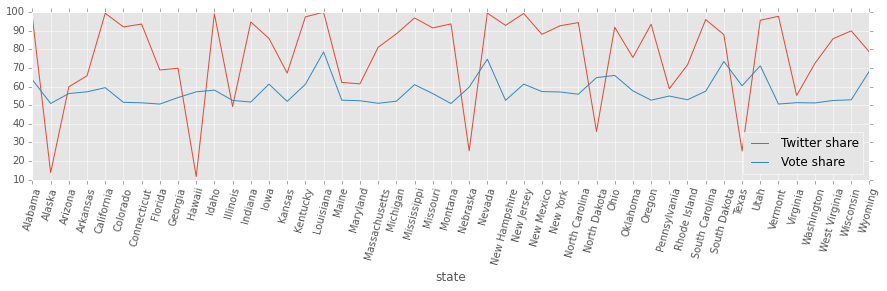

In [9]:
ax = df[['twshare','shareGov']].plot(x = df['state'], xticks=range(47), rot=75,figsize=(15,3))
ax.legend(['Twitter share','Vote share'],loc='best');

In [10]:
states = folium.Map(location=[40, -99], zoom_start=4)
states.geo_json(geo_path=state_geo, data=df, data_out='vote_twfol.json',
                threshold_scale=[5, 10, 15, 20, 30, 40],
                columns=['state', 'voter_follower'],
                key_on='feature.properties.name',
                fill_color='YlGnBu', fill_opacity=0.7, line_opacity=0.2,
                legend_name='The Difference Between Governors Vote Share & Twitter Follower Share (%)')
states.create_map(path='vote_twfol.html')
HTML('<iframe src="vote_twfol.html" style="width: 100%; height: 510px; border: none"></iframe>')

In [11]:
# compute distance matrix
from scipy.spatial.distance import pdist, squareform
distxy = squareform(pdist(df[['twshare','shareGov']], metric='euclidean'))

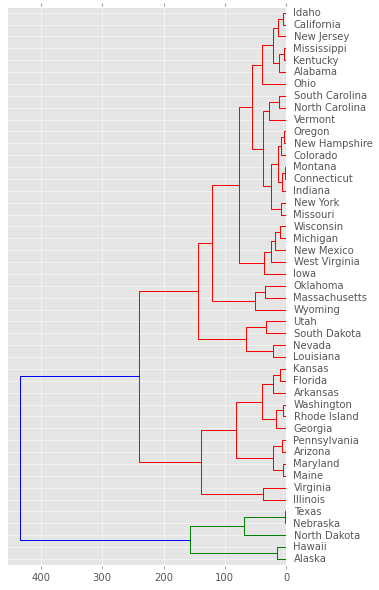

In [12]:
# perform clustering and plot the dendrogram
from scipy.cluster.hierarchy import linkage, dendrogram
ax = plt.subplot(111)
ax.figure.set_size_inches(5,10)
l = linkage(distxy,method='complete')
dendrogram(l,labels=df['state'].tolist(),orientation='right');

In [13]:
# states whose incumbent governors have less followers than their challengers...
df[df['folch']>df['folgov']]

,state,party,since,twgov,twch,shareGov,shareCh,voterCnt,folgov,folch,twshare,voter_follower
1,Alaska,I,2014,AkGovBillWalker,SeanParnellAK,50.899471,46.4,243597,985,6198,13.712933,37.186538
9,Hawaii,D,2014,GovHawaii,DukeAiona2014,57.159353,37.1,366125,599,4558,11.615280,45.544073
11,Illinois,R,2015,BruceRauner,GovernorQuinn,52.533609,45.9,3508302,19654,20236,49.270494,3.263115
24,Nebraska,R,2015,GovRicketts,Vote4Chuck,59.689119,38.9,524068,740,2169,25.438295,34.250824
31,North Dakota,R,2010,NDGovDalrymple,TaylorforND,64.820513,34.3,316336,332,594,35.853132,28.967381
39,Texas,R,2015,GregAbbott_TX,WendyDavisTexas,60.386965,38.9,4707388,58374,171906,25.349140,35.037825


In [14]:
import json
from collections import Counter
f = json.load(open('../data/geocoded.json'))
c2 = Counter()
for state in f:
    #print(state,f[state]['flocs'])
    c2.update(f[state]['flocs'].keys())
c2.most_common(10)

[('38.880344,-77.108260', 50),
 ('38.913611,-77.013222', 50),
 ('33.528370,-112.076300', 50),
 ('39.998012,-75.144793', 49),
 ('39.307956,-76.617016', 49),
 ('38.816242,-77.071282', 48),
 ('42.321597,-71.089115', 48),
 ('39.726287,-104.965486', 48),
 ('33.759506,-84.403176', 48),
 ('40.441419,-79.977292', 47)]

In [15]:
# http://code.xster.net/pygeocoder/wiki/Home
from pygeocoder import Geocoder
for i in range(10):
    x = c2.most_common(10)[i]
    results = Geocoder.reverse_geocode(
        float(x[0].split(',')[0]),
        float(x[0].split(',')[1]))
    print(results, '\t # of followers:',x[1])

4075 Wilson Boulevard, Arlington, VA 22203, USA 	 # of followers: 50
139 Randolph Place Northwest, Washington, DC 20001, USA 	 # of followers: 50
116 West Rose Lane, Phoenix, AZ 85013, USA 	 # of followers: 50
3023 North 9th Street, Philadelphia, PA 19133, USA 	 # of followers: 49
North Charles Street & Interstate 83, Baltimore, MD 21201, USA 	 # of followers: 49
2729 King Street, Alexandria, VA 22302, USA 	 # of followers: 48
146 Dale Street, Boston, MA 02119, USA 	 # of followers: 48
636 Williams Street, Denver, CO 80218, USA 	 # of followers: 48
182 Northside Drive Northwest, Atlanta, GA 30314, USA 	 # of followers: 48
Elmore Street, Pittsburgh, PA 15219, USA 	 # of followers: 47


In [16]:
states = folium.Map(location=[40, -99], zoom_start=4, tiles='Mapbox Bright')
for k,v in c2.items():
    states.circle_marker(location=k.split(','), radius=v*10)
states.create_map(path='unique_govs.html')
HTML('<iframe src="unique_govs.html" style="width: 100%; height: 1000px; border: none"></iframe>')

In [17]:
import json
from collections import Counter
f = json.load(open('../data/geocoded.json'))
c = Counter()
for state in f:
    #print(state,f[state]['flocs'])
    c.update(f[state]['flocs'])

In [18]:
# http://code.xster.net/pygeocoder/wiki/Home
from pygeocoder import Geocoder
for i in range(10):
    x = c.most_common(10)[i]
    results = Geocoder.reverse_geocode(
        float(x[0].split(',')[0]),
        float(x[0].split(',')[1]))
    print(results, '\t # of followers:',x[1])

139 Randolph Place Northwest, Washington, DC 20001, USA 	 # of followers: 26485
146 Dale Street, Boston, MA 02119, USA 	 # of followers: 14453
182 Northside Drive Northwest, Atlanta, GA 30314, USA 	 # of followers: 8384
636 Williams Street, Denver, CO 80218, USA 	 # of followers: 8379
1017 West 31st Street, Austin, TX 78705, USA 	 # of followers: 6633
2801 South Leavitt Street, Chicago, IL 60608, USA 	 # of followers: 6432
2513 East Burnside Street, Portland, OR 97214, USA 	 # of followers: 5856
Buffalo Bayou Bike Trail, Houston, TX 77019, USA 	 # of followers: 5521
1816 Portland Avenue, Minneapolis, MN 55404, USA 	 # of followers: 4804
3814 Munger Avenue, Dallas, TX 75204, USA 	 # of followers: 4674


In [19]:
states = folium.Map(location=[40, -99], zoom_start=4, tiles='Mapbox Bright')
for k,v in c.items():
    states.circle_marker(location=k.split(','), radius=v)
states.create_map(path='all_followers.html')
HTML('<iframe src="all_followers.html" style="width: 100%; height: 1000px; border: none"></iframe>')

In [20]:
from mpl_toolkits.basemap import Basemap
from matplotlib.path import Path

# Mercator Projection
# http://matplotlib.org/basemap/users/merc.html
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80,
            llcrnrlon=-180, urcrnrlon=180, lat_ts=20, resolution='c')

# Poly vertices
p = [[25.774252, -80.190262], [18.466465, -66.118292], [32.321384, -64.75737]]

# Projected vertices
p_projected = [m(x[1], x[0]) for x in p]

# Create the Path
p_path = Path(p_projected)

# Test points
p1 = [27.254629577800088, -76.728515625]
p2 = [27.254629577800088, -74.928515625]

# Test point projection
p1_projected = m(p1[1], p1[0])
p2_projected = m(p2[1], p2[0])

print(p_path.contains_point(p1_projected))
print(p_path.contains_point(p2_projected))

1
1
